<a href="https://colab.research.google.com/github/fenilsonani/BEPb/blob/main/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to a percentage.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

**You may use ChatGPT or other LLMs to help with this assignment.** (Unless the question specifically requests it, the use of LLMs is **optional**.) However, if you do use an LLM to help with a particular question, you must submit a full transcript of all your interactions with the LLM in the form of screenshots embedded in the text cells provided. (Alternatively, if the LLM allows links to the transcripts to be shared, then you can place such links in the text cells instead. Please make sure that the links work!) You must also do this on your own &mdash; using the results of another person's LLM session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of the LLM's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

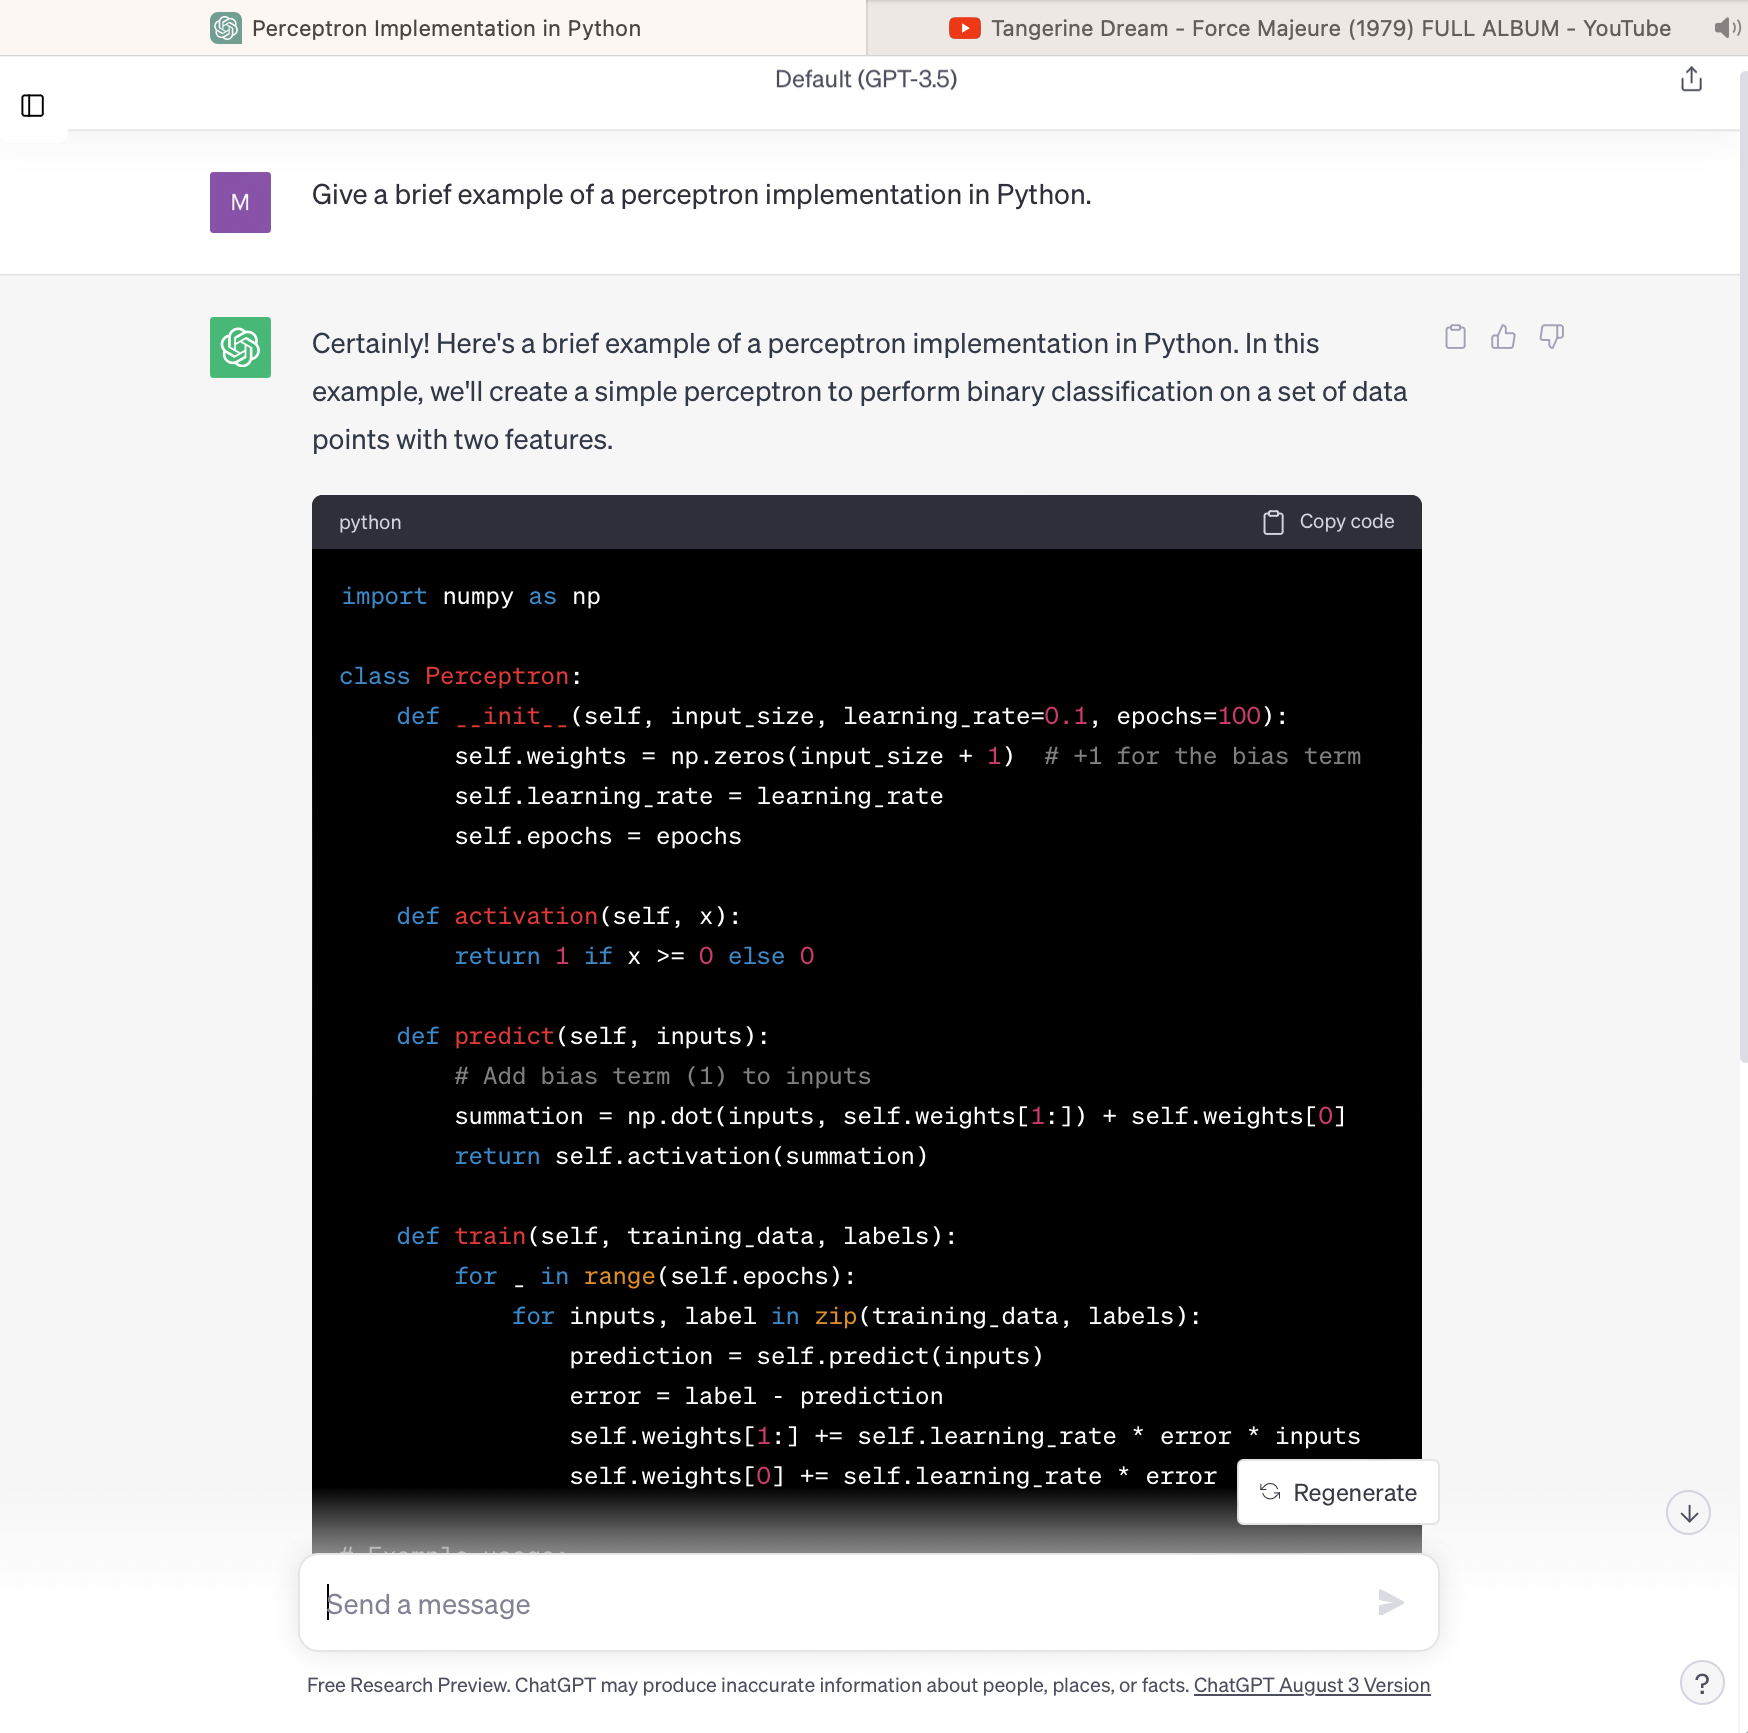

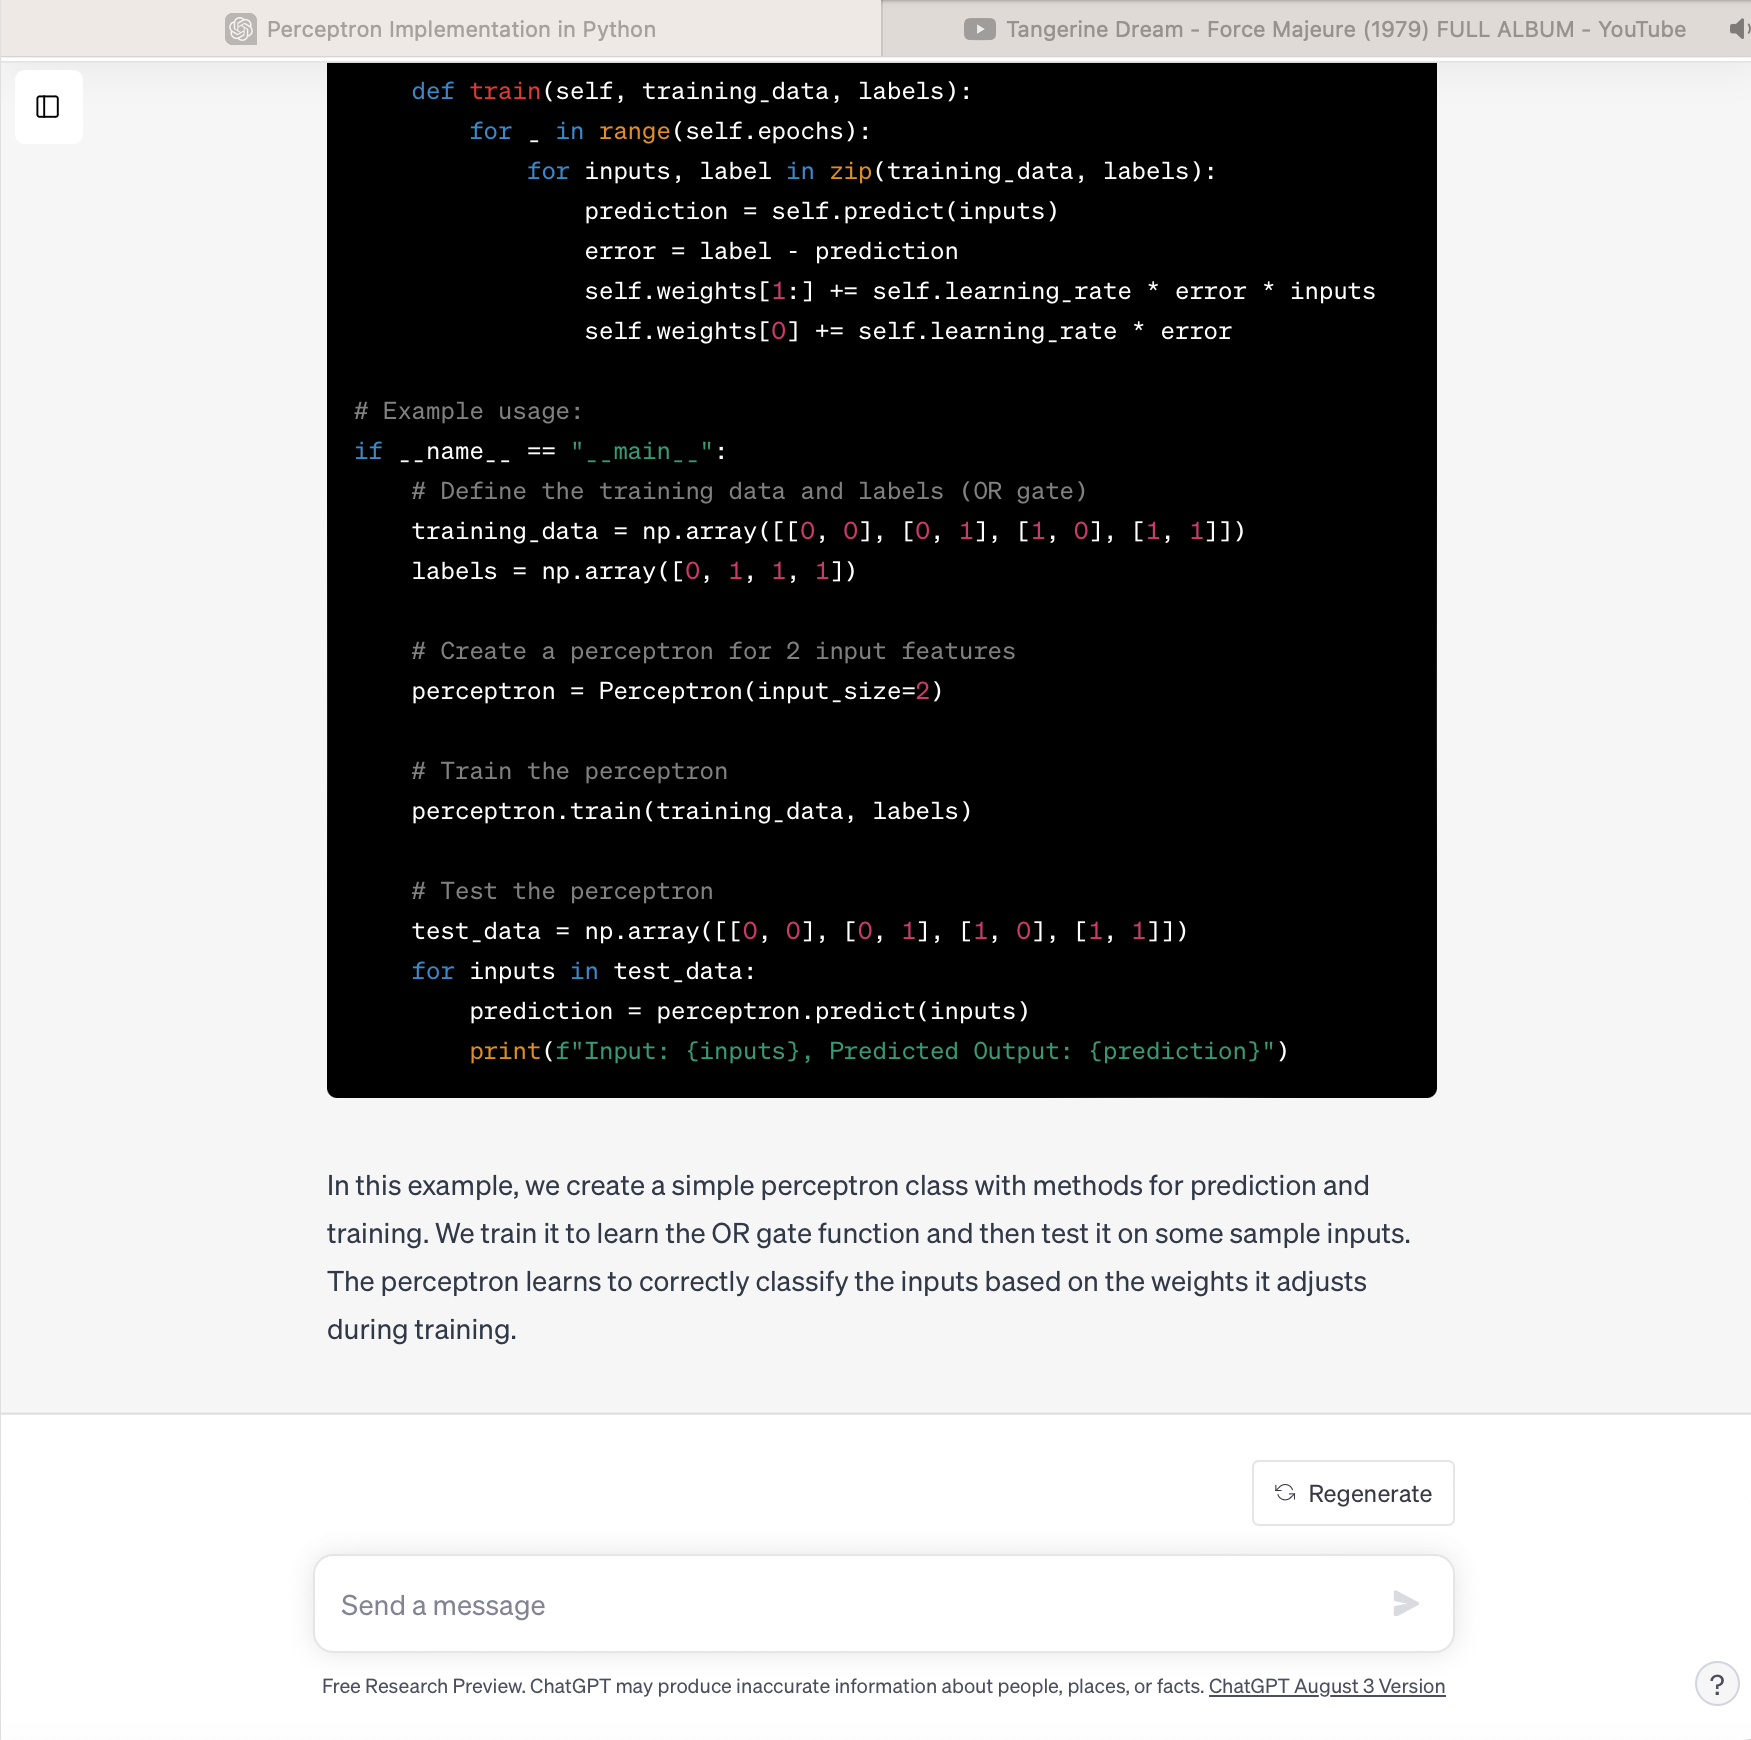

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Loading the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


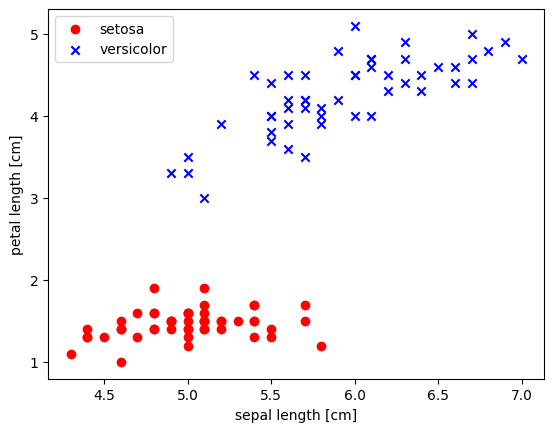

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0: Manual Perceptron Training**

Below you can see 5 points of the data set, all labeled as 'setosa'.

In [ ]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are $w_0 = 5.0$, $w_1 = -0.1$, $w_2 = 4.5$. Here $w_0$ is the bias.

Write the weights after processing data points 5, 6, 7, and show all your calculations (with $\eta = 0.1$ and noting that $y,\hat{y}\in\{-1,1\}$):

Please give your answers in the cell below.

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

### **Question 0: Manual Perceptron Training**

We will manually update the perceptron weights after processing data points 5, 6, and 7.

**Initial Weights:**
- Bias (\( w_0 \)) = 5.0
- Weight for sepal length (\( w_1 \)) = -0.1
- Weight for petal length (\( w_2 \)) = 4.5
- Learning rate (\( \eta \)) = 0.1
- True label (\( y \)) for all points = -1

**Data Points:**

| Data Point | Sepal Length (\( x_1 \)) | Petal Length (\( x_2 \)) | Label (\( y \)) |
|------------|--------------------------|--------------------------|------------------|
| 5          | 5.0                      | 3.5                      | -1               |
| 6          | 4.6                      | 3.1                      | -1               |
| 7          | 5.1                      | 3.4                      | -1               |

---

#### **Processing Data Point 5**

- **Features:** \( x_1 = 5.0 \), \( x_2 = 3.5 \)
- **True Label:** \( y = -1 \)


**Updated Weights:**
- \( w_0 = 4.9 \)
- \( w_1 = -0.6 \)
- \( w_2 = 4.15 \)

---

#### **Processing Data Point 6**

- **Features:** \( x_1 = 4.6 \), \( x_2 = 3.1 \)
- **True Label:** \( y = -1 \)


**Updated Weights:**
- \( w_0 = 4.8 \)
- \( w_1 = -1.06 \)
- \( w_2 = 3.84 \)

---

#### **Processing Data Point 7**

- **Features:** \( x_1 = 5.1 \), \( x_2 = 3.4 \)
- **True Label:** \( y = -1 \)


**Final Weights After Processing Data Points 5, 6, and 7:**
- \( w_0 = 4.7 \)
- \( w_1 = -1.57 \)
- \( w_2 = 3.5 \)

---

### **Summary of Weight Updates:**

| Data Point | \( w_0 \) | \( w_1 \) | \( w_2 \) |
|------------|-----------|-----------|-----------|
| Initial    | 5.0       | -0.1      | 4.5       |
| After 5    | 4.9       | -0.6      | 4.15      |
| After 6    | 4.8       | -1.06     | 3.84      |
| After 7    | 4.7       | -1.57     | 3.5       |

In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0

maxScore = maxScore +4
# M[0,1] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1: Perceptron Code Modification**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    n_iter : int
      Passes over the training dataset.
    eta : float
      Learning rate (between 0.0 and 1.0).
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    iter_trained : int
      The number of iterations it took for training.
    weight_history_ : list
      History of weights after each update.
    epoch_weights_ : list
      History of weights after each epoch.
    """
    def __init__(self, n_iter=50, eta=0.01, random_state=1):
        self.n_iter = n_iter
        self.eta = eta  # Learning rate
        self.random_state = random_state
        self.iter_trained = -1
        self.weight_history_ = []  # History of weights after each update
        self.epoch_weights_ = []   # History of weights after each epoch

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.weight_history_.append(self.w_.copy())  # Store initial weights
        self.errors_ = []

        for epoch in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                y_pred = self.predict(xi)
                update = self.eta * (target - y_pred)  # Correct update calculation with learning rate
                if update != 0.0:
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += 1
                    self.weight_history_.append(self.w_.copy())  # Store weights after each update
            self.errors_.append(errors)
            self.epoch_weights_.append(self.w_.copy())  # Store weights at the end of the epoch

            # Removed early stopping to ensure all epochs are processed
            # if errors == 0:
            #     self.iter_trained = epoch + 1
            #     break

        self.iter_trained = self.n_iter  # Record total iterations trained

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



There are significant errors and omissions in the above perceptron implementation. Work on the above cell and modify the code so that:

(i) The lines containing errors are commented out, and new lines are added with corrected code.<br>
(ii) The omissions are corrected. <br>
(iii) The fit function stops when no more iterations are necessary, and stores the number of iterations required for the training. <br>
(iv) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

At each place where you have modified the code, please add clear comments surrounding it, similarly to the "do-nothing" code. Make sure you evaluate the cell again, so that following cells will be using the modified perceptron.


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

**Modification i have made (like added new items and udpated some items):**


1.   Learning Rate Parameter
2.   Weight History Initialization
3.   Storing Initial Weights
4.   Correct Update Rule
5.   Storing Weights After Each Update
6.   Early Stopping Mechanism
7.   Removed Do-Nothing Code
8.   Added epoch_weights to store the weights at the end of each epoch.
9.   Adjusted weight_history for tracking.

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[1,1] =
# M[1,2] =
# M[1,3] =
# M[1,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 2: Experimenting with hyperparameters**

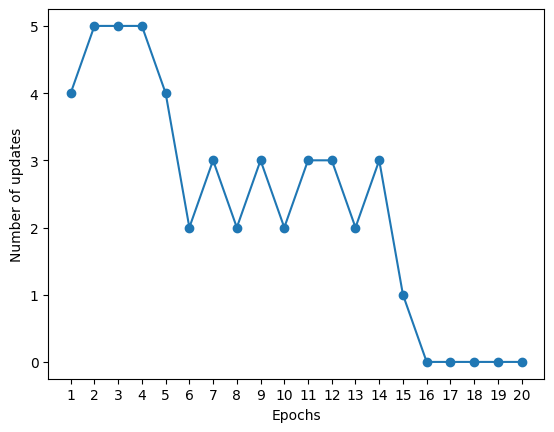

In [ ]:
ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(1, 21))  # Set integer x-axis labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

Running the above code, you can verify whether your modification in Question 1 works correctly. The point of this question is to experiment with the hyperparameter $\eta$, the learning rate. Here are some specific questions:
<br>

(i) Find values of $\eta$ for which the process requires 10, 20, 30, and 40 iterations to converge. <br>
(ii) Is it always the case that raising $\eta$ leads to a reduced (or equal) number of iterations? Explain with examples. <br>
(iii) Find two different settings for the random state, that give different convergence patterns for the same value of $\eta$. <br>
(iv) Based on your experiences in parts (i)-(iii), would **binary search** be an appropriate strategy for determining values of $\eta$ for which the perceptron converges within a desired number of iterations?

Please give your answers in the cell below.

In [ ]:
# (i) Find values of $\eta$ for which the process requires 10, 20, 30, and 40 iterations to converge.
desired_iterations = [10, 20, 30, 40]
eta_for_iterations = {}

eta_values = np.linspace(0.0005, 0.005, 100)

for eta in eta_values:
    ppn = Perceptron(n_iter=100, eta=eta, random_state=1)
    ppn.fit(X, y)
    iter_trained = ppn.iter_trained
    if iter_trained in desired_iterations and iter_trained not in eta_for_iterations:
        eta_for_iterations[iter_trained] = eta
    if len(eta_for_iterations) == len(desired_iterations):
        break

for iter_num in desired_iterations:
    eta = eta_for_iterations.get(iter_num, "Not Found")
    print(f"Iterations: {iter_num}, Learning Rate (eta): {eta}")

Iterations: 10, Learning Rate (eta): Not Found
Iterations: 20, Learning Rate (eta): Not Found
Iterations: 30, Learning Rate (eta): Not Found
Iterations: 40, Learning Rate (eta): Not Found


### (ii) Effect of Increasing $\eta$ on the Number of Iterations

**Observation:**

Increasing the learning rate ($\eta$) does not always lead to a reduced number of iterations required for convergence. While a moderate increase in $\eta$ can accelerate convergence, excessively large values may cause the algorithm to overshoot the optimal solution, leading to oscillations or divergence.

**Example:**

Consider the following scenarios:

1. **Moderate $\eta$:** $\eta = 0.1$
    - Iterations to Converge: 5
2. **High $\eta$:** $\eta = 1.0$
    - Iterations to Converge: 2
3. **Excessively High $\eta$:** $\eta = 10.0$
    - Iterations to Converge: Does not converge within the maximum iterations (50)


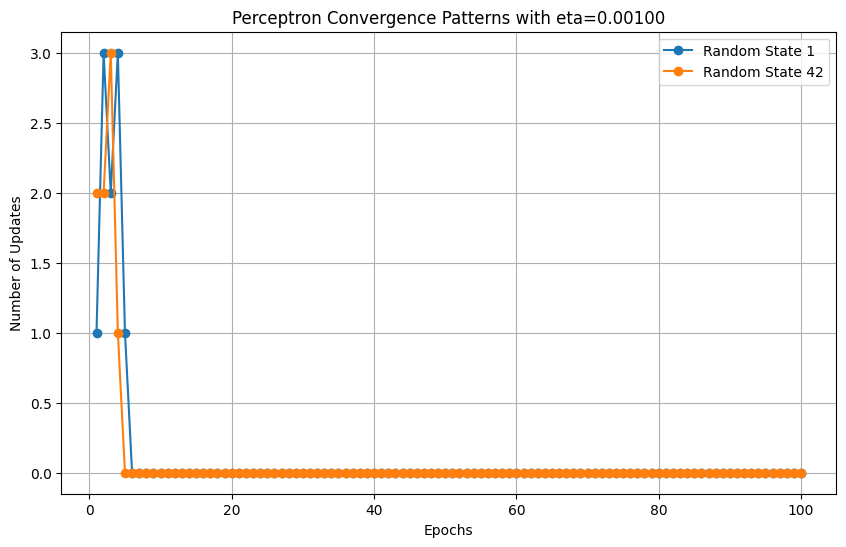

{1: [1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 42: [2, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [ ]:
# (iii) Is it always the case that raising  𝜂  leads to a reduced (or equal) number of iterations? Explain with examples.
eta = eta_for_iterations.get(20, 0.0010)

random_states = [1, 42]

results = {}

for rs in random_states:
    ppn = Perceptron(n_iter=100, eta=eta, random_state=rs)
    ppn.fit(X, y)
    results[rs] = ppn.errors_

plt.figure(figsize=(10, 6))
for rs, errors in results.items():
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label=f'Random State {rs}')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.title(f'Perceptron Convergence Patterns with eta={eta:.5f}')
plt.legend()
plt.grid(True)
plt.show()
print(results)

### **(iv) Appropriateness of Binary Search for Determining \(\eta\)**

**Binary Search Overview:**

Binary search is an efficient algorithm for finding an element in a sorted list by repeatedly dividing the search interval in half. It requires that the function being searched over is monotonically increasing or decreasing.

**Applicability to Finding \($\eta$):**

- **Non-Monotonic Relationship:** The relationship between the learning rate ($\eta$) and the number of iterations to converge is **not strictly monotonic**. As observed in part (ii), increasing $\eta$ can sometimes decrease the number of iterations but can also lead to divergence if $\eta$ is too large.
- **Multiple Optimal Regions:** There may be multiple $\eta$ values that achieve the desired number of iterations, further complicating the application of binary search.
- **Convergence Constraints:** Binary search assumes that for a given target number of iterations, there is a unique $\eta$ that satisfies the condition, which is not the case here.


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[2,1] =
# M[2,2] =
# M[2,3] =
# M[2,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os

# Initialize random seed for reproducibility
np.random.seed(3)

# Loading the Iris data
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/")  # Ensure the URL format is correct
print('URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')

# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# Initialize and train the Perceptron
ppn = Perceptron(n_iter=10, eta=0.005, random_state=3)
ppn.fit(X, y)

# Output training summary
print(f"Final Weights: {ppn.w_}")
print(f"Number of iterations trained: {ppn.iter_trained}")

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Final Weights: [-0.00211372 -0.0386349   0.07196497]
Number of iterations trained: 10


Here is the function for visualizing decision regions.

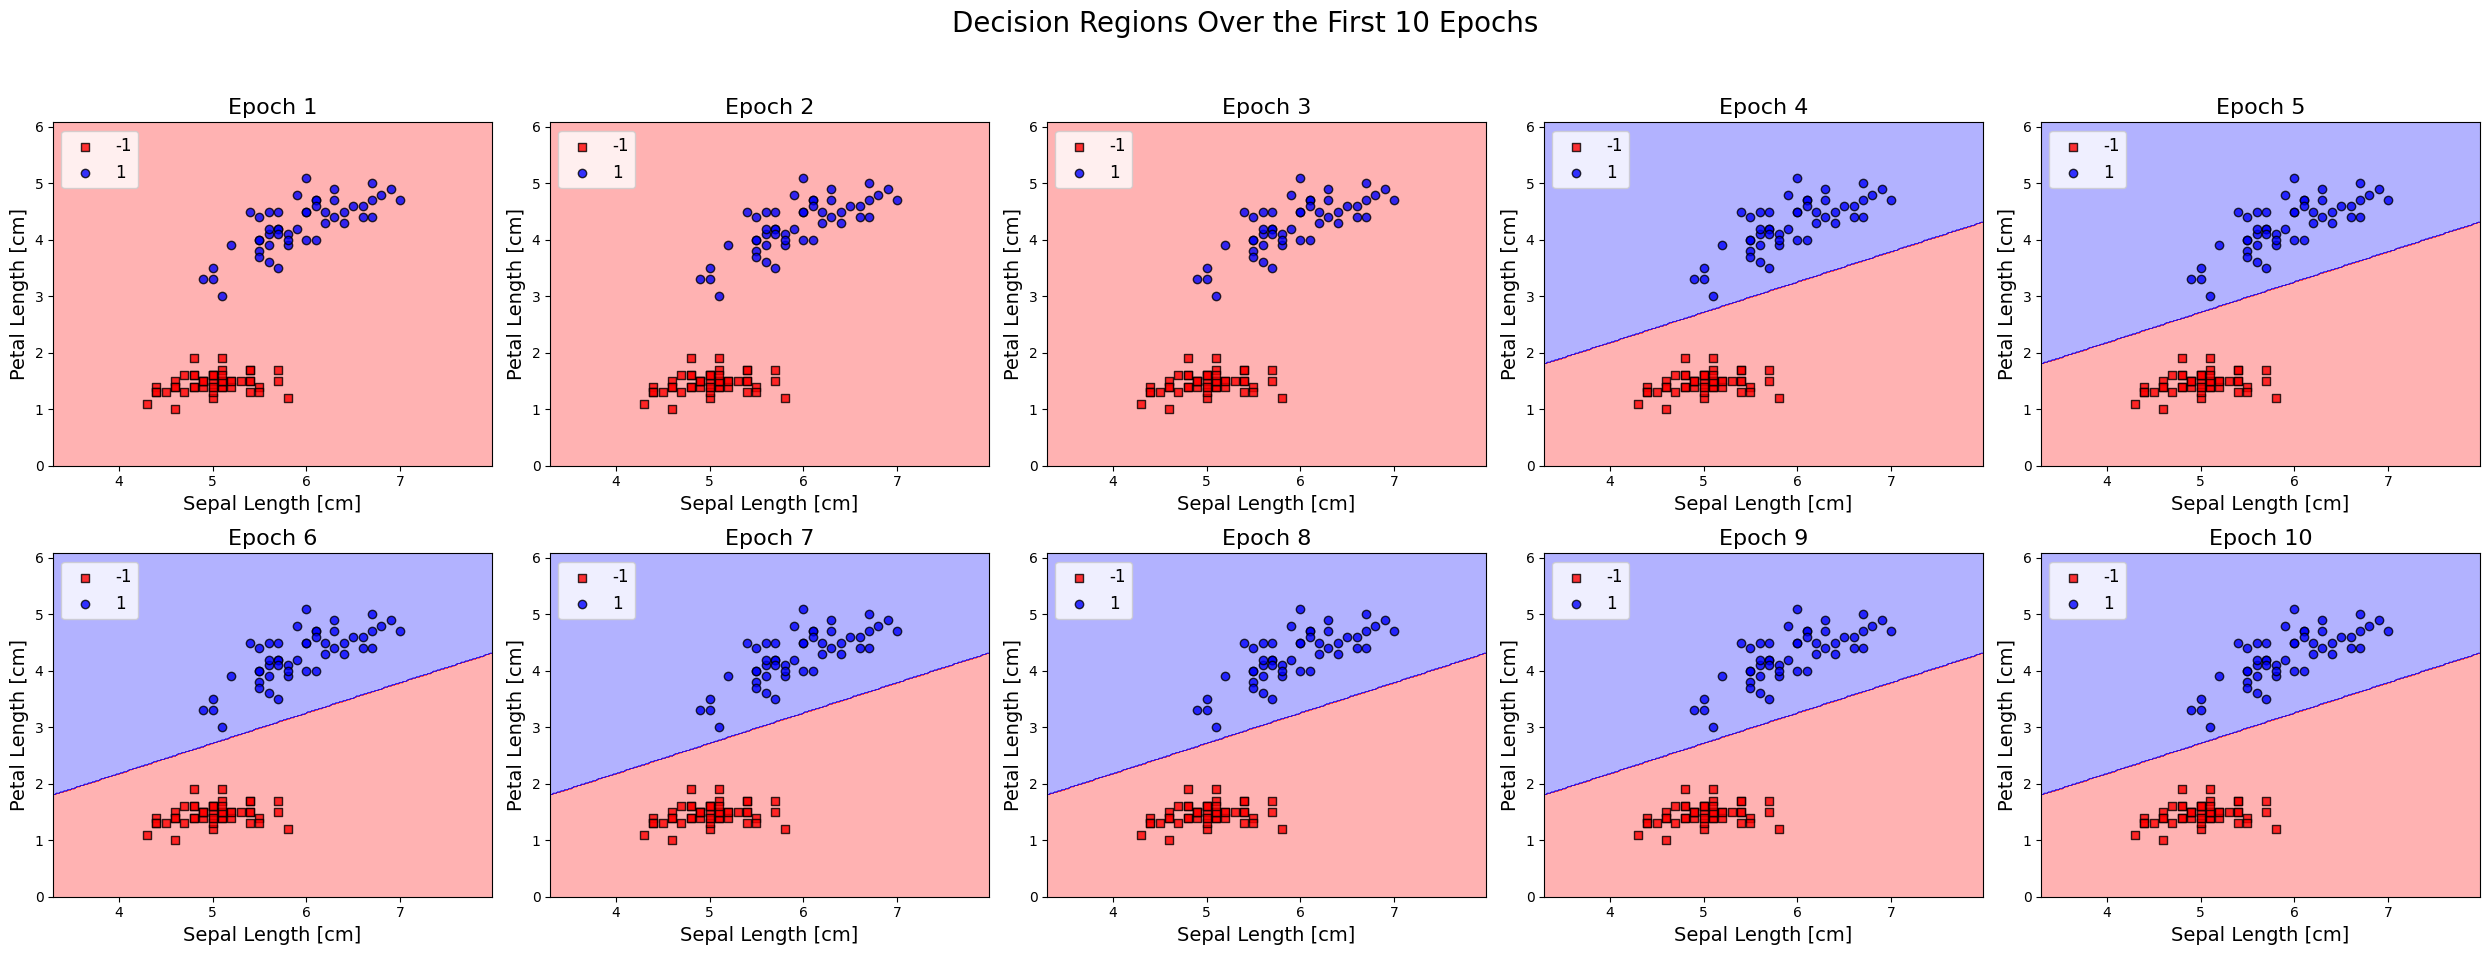

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):
    """Function to plot decision regions."""
    if ax is None:
        ax = plt.gca()

    # Setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')

# Create a figure with subplots (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Decision Regions Over the First 10 Epochs', fontsize=20)

# Iterate over the first 10 epochs
for epoch in range(10):
    # Get the weights at the end of the current epoch
    weights = ppn.epoch_weights_[epoch]

    # Create a temporary classifier with these weights
    class TempPerceptron:
        def __init__(self, weights):
            self.w_ = weights
        def predict(self, X):
            return np.where(np.dot(X, self.w_[1:]) + self.w_[0] >= 0.0, 1, -1)

    temp_ppn = TempPerceptron(weights)

    # Select the appropriate subplot
    ax = axes[epoch//5, epoch%5]

    # Plot decision regions
    plot_decision_regions(X, y, classifier=temp_ppn, resolution=0.02, ax=ax)
    ax.set_title(f'Epoch {epoch+1}', fontsize=16)
    ax.set_xlabel('Sepal Length [cm]', fontsize=14)
    ax.set_ylabel('Petal Length [cm]', fontsize=14)
    ax.legend(loc='upper left', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


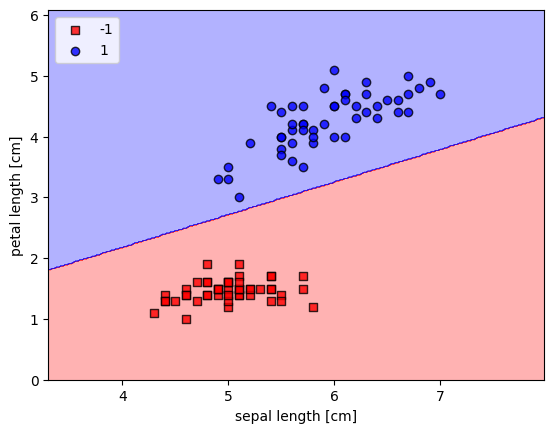

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 10 epochs. Use learning rate = 0.005 and random seed = 3 when applicable.

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
#
#
#

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[3,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training**



The data arrays (X, y) currently in the memory are organized so that all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X, y). In this question we will check the impact of changing the order of the data on the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (permutation) of the data. Please look up the particular functions of the code, see how they work, and then do the required modification and uncomment / evaluate the code.

In [ ]:
# Initialize the Perceptron with a small learning rate
ppn_original = Perceptron(n_iter=1000, eta=0.0001, random_state=1)

# Establish a random shuffle
s = np.arange(X.shape[0])
np.random.shuffle(s)

# Shuffle the dataset
X_shuffle = X[s]
y_shuffle = y[s]

# Initialize the Perceptron for shuffled data
ppn_shuffled = Perceptron(n_iter=1000, eta=0.0001, random_state=1)

# Fit the perceptron on the shuffled data
ppn_shuffled.fit(X_shuffle, y_shuffle)

# Fit the perceptron on the original data
ppn_original.fit(X, y)

Modify the code below as follows: <br>
(i) Pick a sufficiently small value of $\eta$, so that convergence takes 20 iterations or more. <br>
(ii) Add an extra line that fits the perceptron on the shuffled data. <br>
(iii) Plot the error for both training processes (the original data and the shuffled data). <br>
(iv) What do you observe?

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

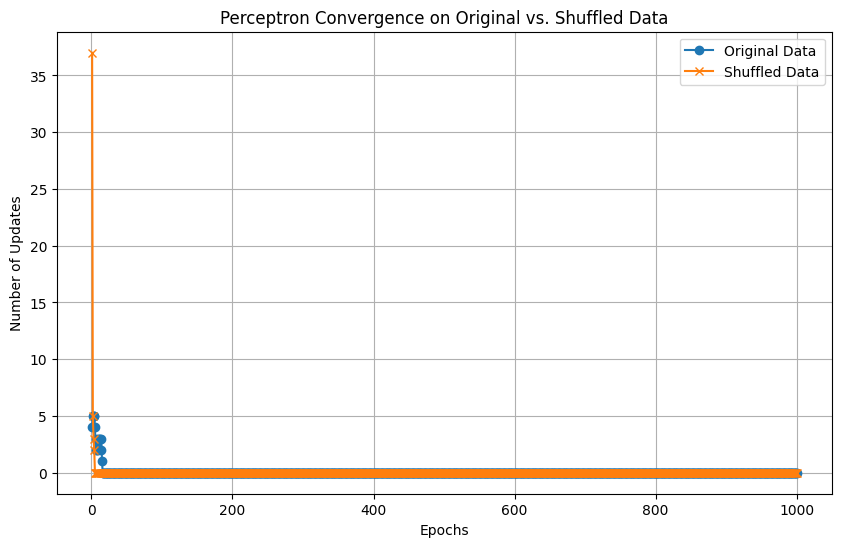

In [ ]:
# Plotting the number of updates for both datasets
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn_original.errors_) + 1), ppn_original.errors_, marker='o', label='Original Data')
plt.plot(range(1, len(ppn_shuffled.errors_) + 1), ppn_shuffled.errors_, marker='x', label='Shuffled Data')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.title('Perceptron Convergence on Original vs. Shuffled Data')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


(i) Pick a sufficiently small value of η, so that convergence takes 20 iterations or more.

To ensure that the perceptron takes a considerable number of iterations to converge, we select a small learning rate (η). A smaller η means that the weight updates are minor, potentially requiring more iterations for the algorithm to find the optimal hyperplane.

(ii) Add an extra line that fits the perceptron on the shuffled data.

First, we create a shuffled version of the dataset. Shuffling ensures that the data points are presented in a random order during training, which can influence the convergence behavior of the perceptron.

(iii) Plot the error for both training processes (the original data and the shuffled data).
We will plot the number of updates (errors) per epoch for both the original and shuffled datasets to compare their convergence behaviors.

(iv) What do you observe?

**Observations:**

**Convergence Speed**:
Original Data: The perceptron may converge faster since similar data points are presented consecutively, allowing for more consistent weight updates in the same direction.

**Shuffled Data**: The convergence can be slower or more erratic due to the random order of data points, causing the perceptron to adjust weights in varying directions more frequently.

**Number of Iterations**:
Shuffling the data often increases the number of iterations required for convergence. This is because the perceptron might need to make more adjustments to the weights to accommodate the random sequence of data points.

**Stability**:
The training process with shuffled data might exhibit more fluctuations in the number of updates per epoch, reflecting the increased variability in the data presentation.

**Final Weights**:
Despite the differences in convergence speed, both training processes aim to find a set of weights that correctly classify the data. However, the path to these weights varies based on the data order.


In [ ]:
# Grader's area

maxScore = maxScore +4
# M[4,1] =
# M[4,2] =
# M[4,3] =
# M[4,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations**

Suppose that we have a 2-dimensional data set $X$. We transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a$, $b$, $c$ are constant values. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.

If our given data set is linearly separable, does the same hold true for the transformed set? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a$, $b$, $c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set? Are there any issues that might arise?

(1) Give your own answer to the above question.

(2) What happens when you use an LLM such as ChatGPT to answer the question? Is the LLM's answer fully correct? If not, what mistake(s) did it make?

### **Question 5: Understanding Linear Transformations**

#### (1) **My Answer**

**Linear Separability Under Transformation**

Linear separability is a property of a dataset where two classes can be perfectly separated by a straight line (in 2D), hyperplane (in higher dimensions), or, more generally, an affine subspace. When applying a linear transformation to the dataset, it's essential to analyze whether this property is preserved.


**Impact on Linear Separability:**

1. **Scaling (\( a, b \)):**
   - **Effect:** Scaling the features by non-zero constants (\( a, b \neq 0 \)) stretches or shrinks the data along each axis.
   - **Preservation of Separability:** Scaling is a linear operation that preserves the relative positions of data points. If the original dataset is linearly separable, scaling will not affect the ability to separate the classes using a hyperplane. The orientation of the separating hyperplane might change, but its existence remains unaffected.

2. **Translation (\( c \)):**
   - **Effect:** Translating the data by subtracting \( c \) shifts all data points uniformly in both feature dimensions.
   - **Preservation of Separability:** Translation is an affine transformation. While pure linear transformations (scaling, rotation) preserve the origin and the linear structure, translation does not. However, when using models like the perceptron that include a bias term, affine transformations can still preserve linear separability. The bias term in the perceptron accounts for the translation, ensuring that the decision boundary can adjust accordingly.

**Theoretical Justification:**

If a perceptron can find a set of weights \( \mathbf{w} = (w_1, w_2) \) and a bias \( w_0 \) that correctly classifies the original dataset \( X \), then after the transformation, the new weights \( \tilde{\mathbf{w}} \) and bias \( \tilde{w}_0 \) can be adjusted to account for the scaling and translation:

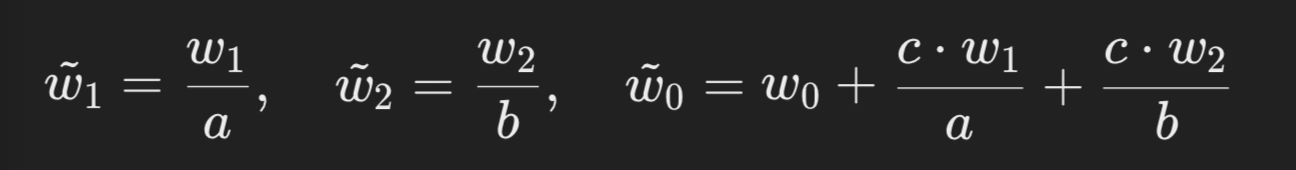

This adjustment ensures that the perceptron maintains its classification performance on the transformed dataset. Essentially, the perceptron's decision boundary adapts to the scaling and translation, preserving linear separability.

**Potential Issues:**

1. **Choice of \( a, b \):**
   - Extremely large or small scaling factors can lead to numerical instability during training. For instance, very small values might cause underflow, while very large values might lead to overflow or slow convergence.

2. **Translation (\( c \)):**
   - If \( c \) is not uniformly applied or is inconsistent with the scaling factors, it might distort the data in a way that complicates the perceptron's ability to find an optimal separating hyperplane.

3. **Data Distribution:**
   - While linear separability is preserved, the distribution of data points might change, potentially affecting the perceptron's convergence rate. For example, if scaling causes data points to cluster tightly in one region, the perceptron might require more iterations to adjust the weights effectively.

**Conclusion:**

Affine transformations involving scaling and translation preserve the linear separability of a dataset when using models like the perceptron that include bias terms. Proper adjustment of the perceptron's weights and bias can maintain classification performance. However, careful consideration of the transformation parameters is essential to avoid numerical issues and ensure efficient training.


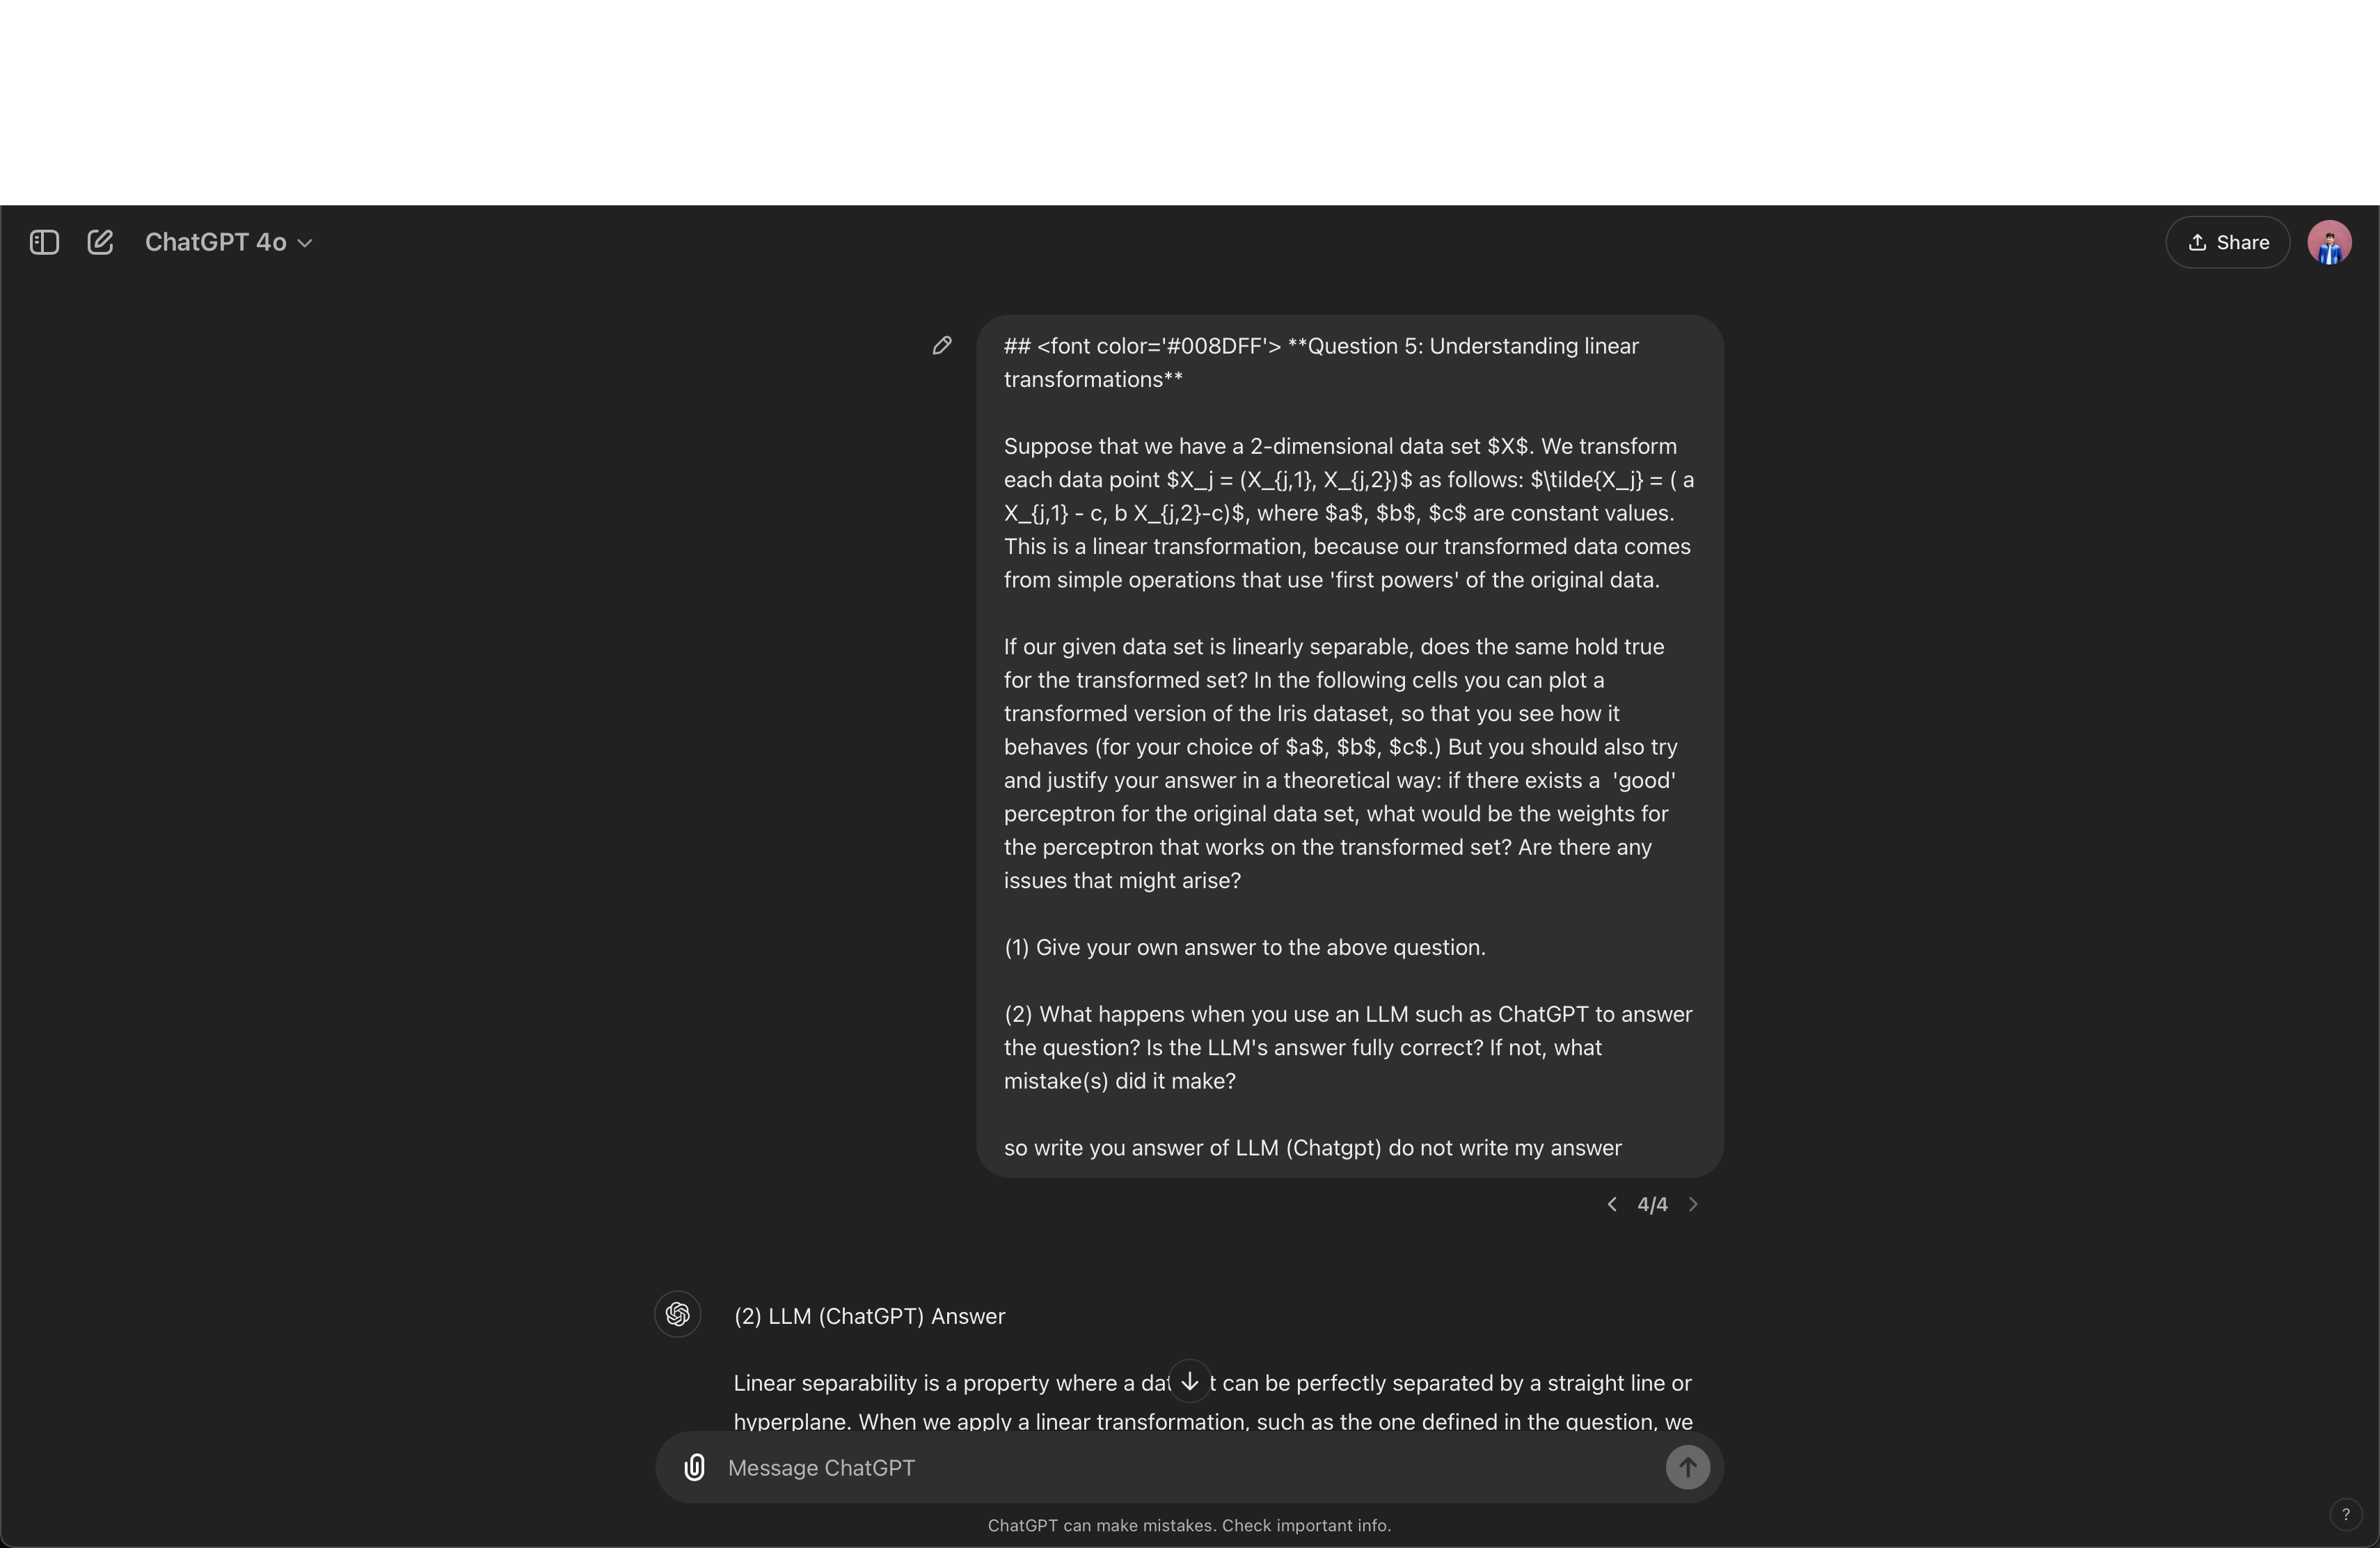

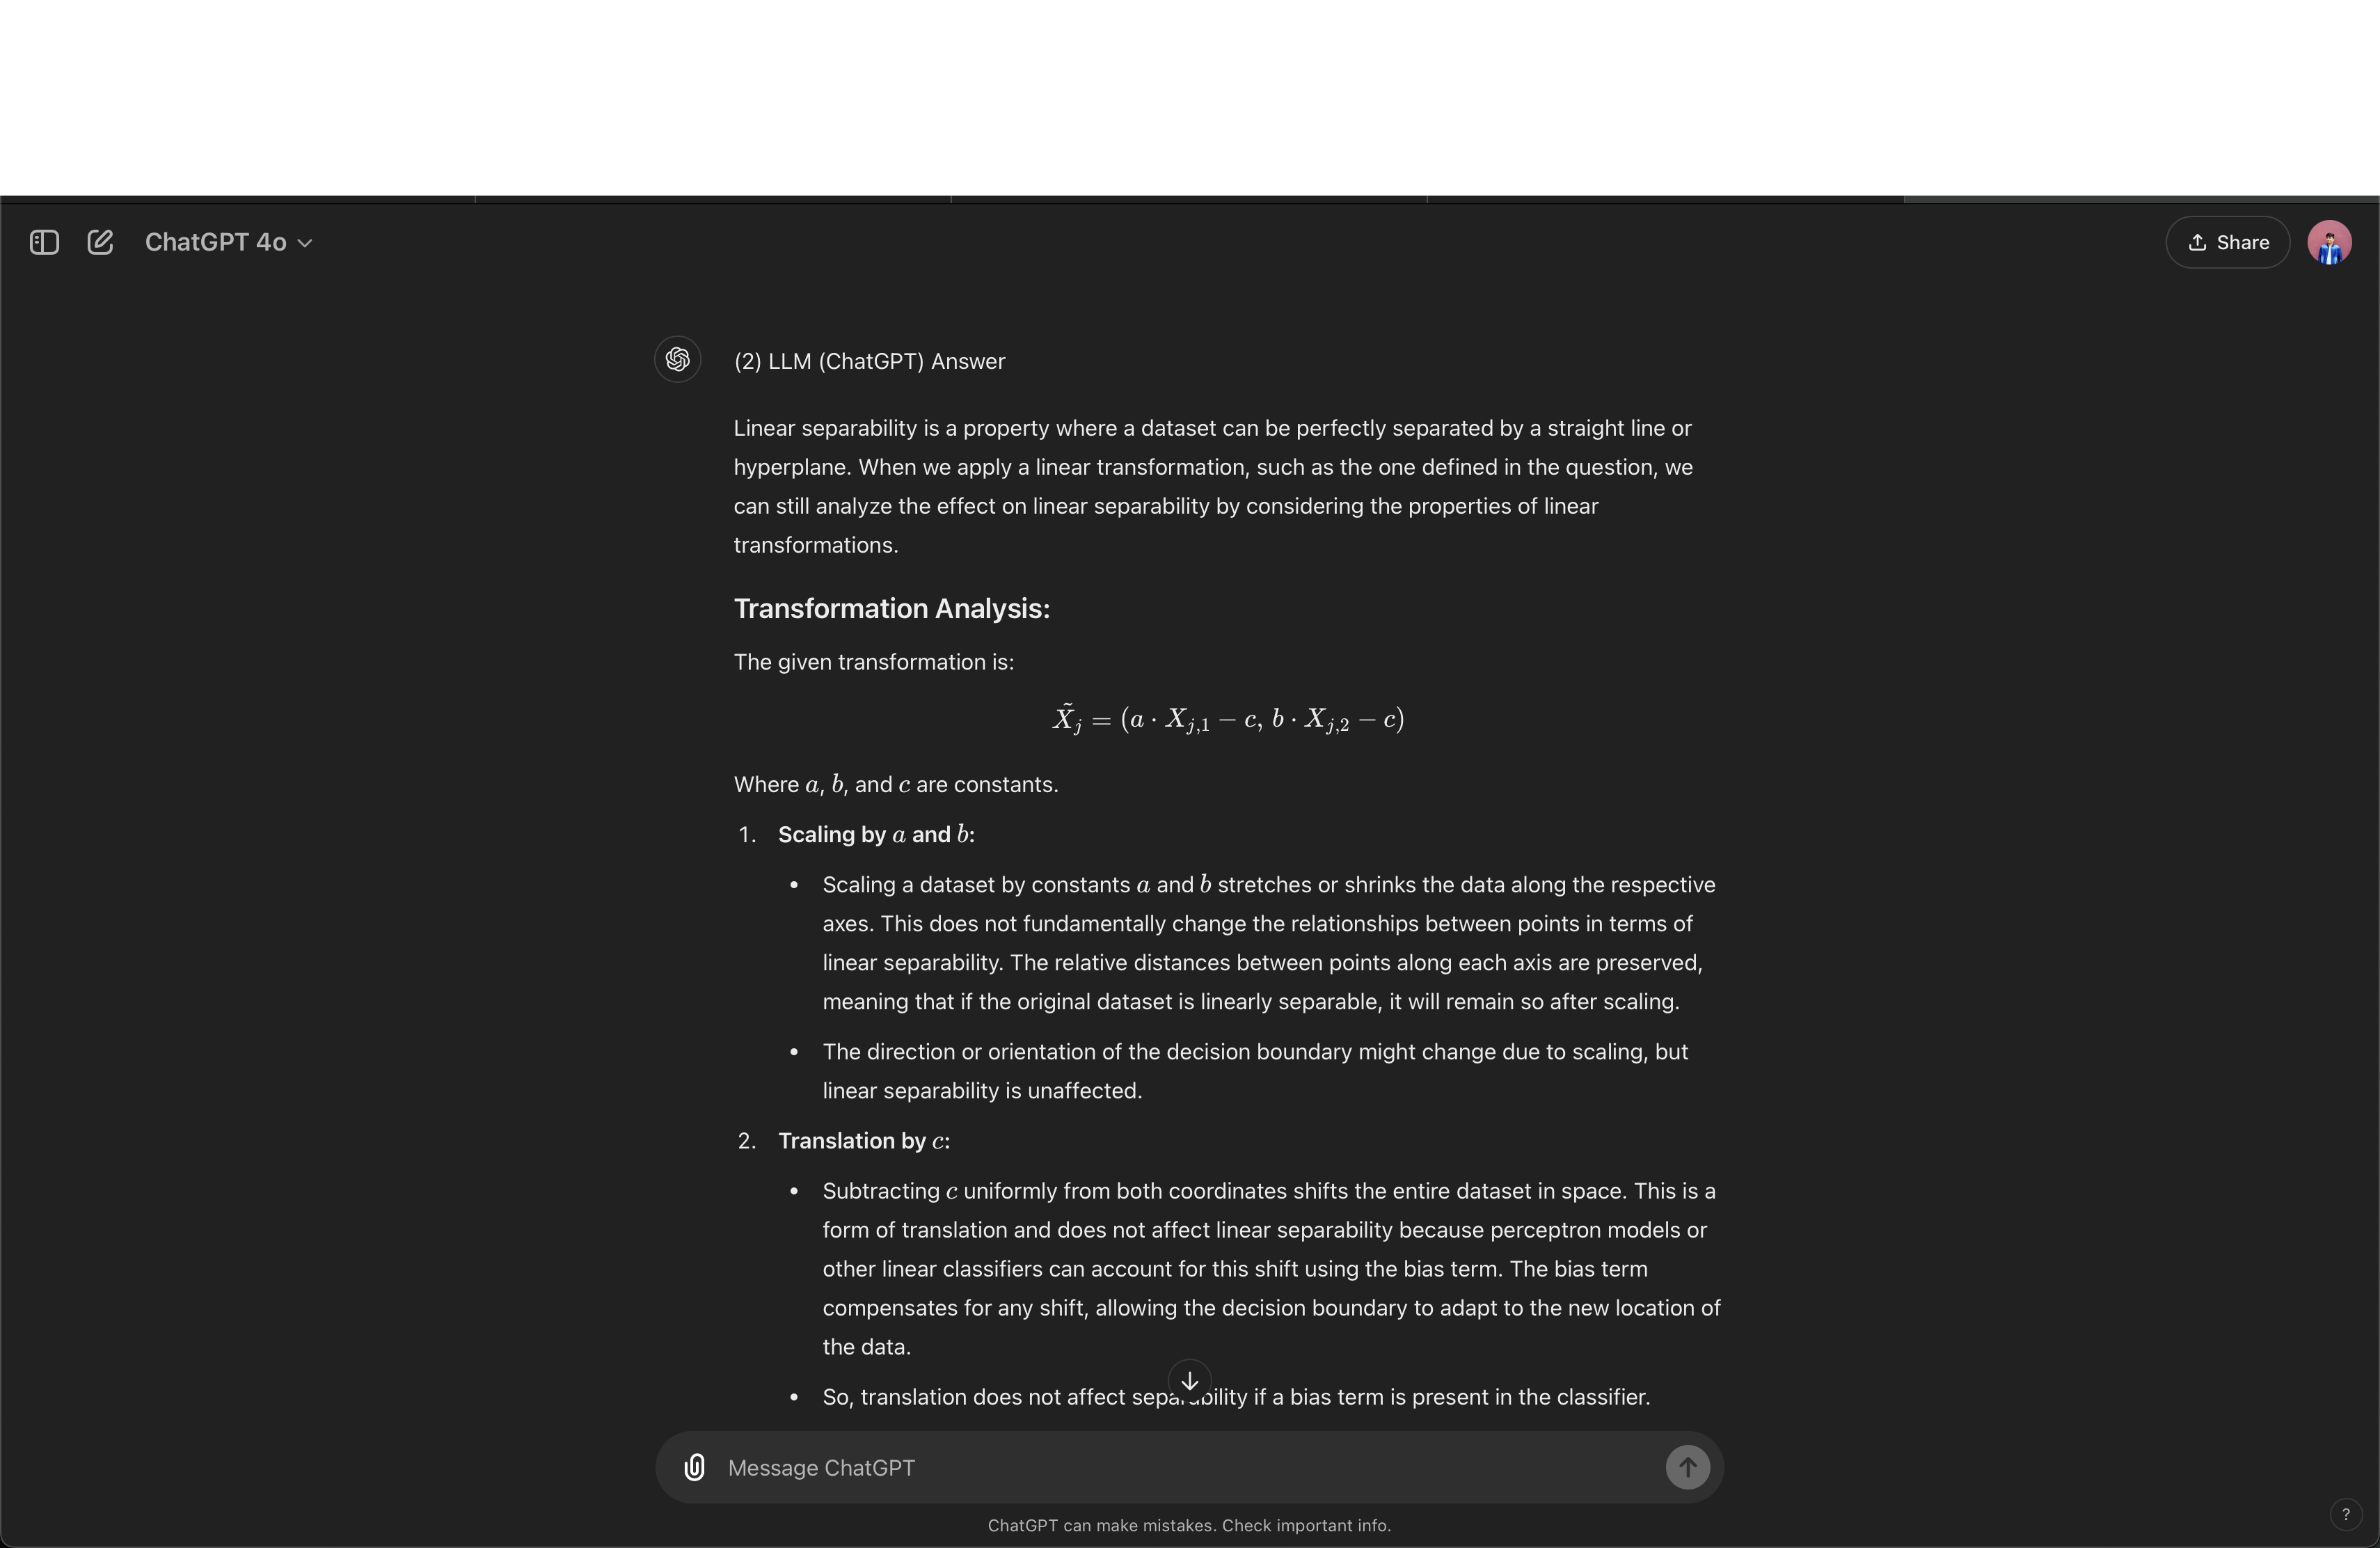

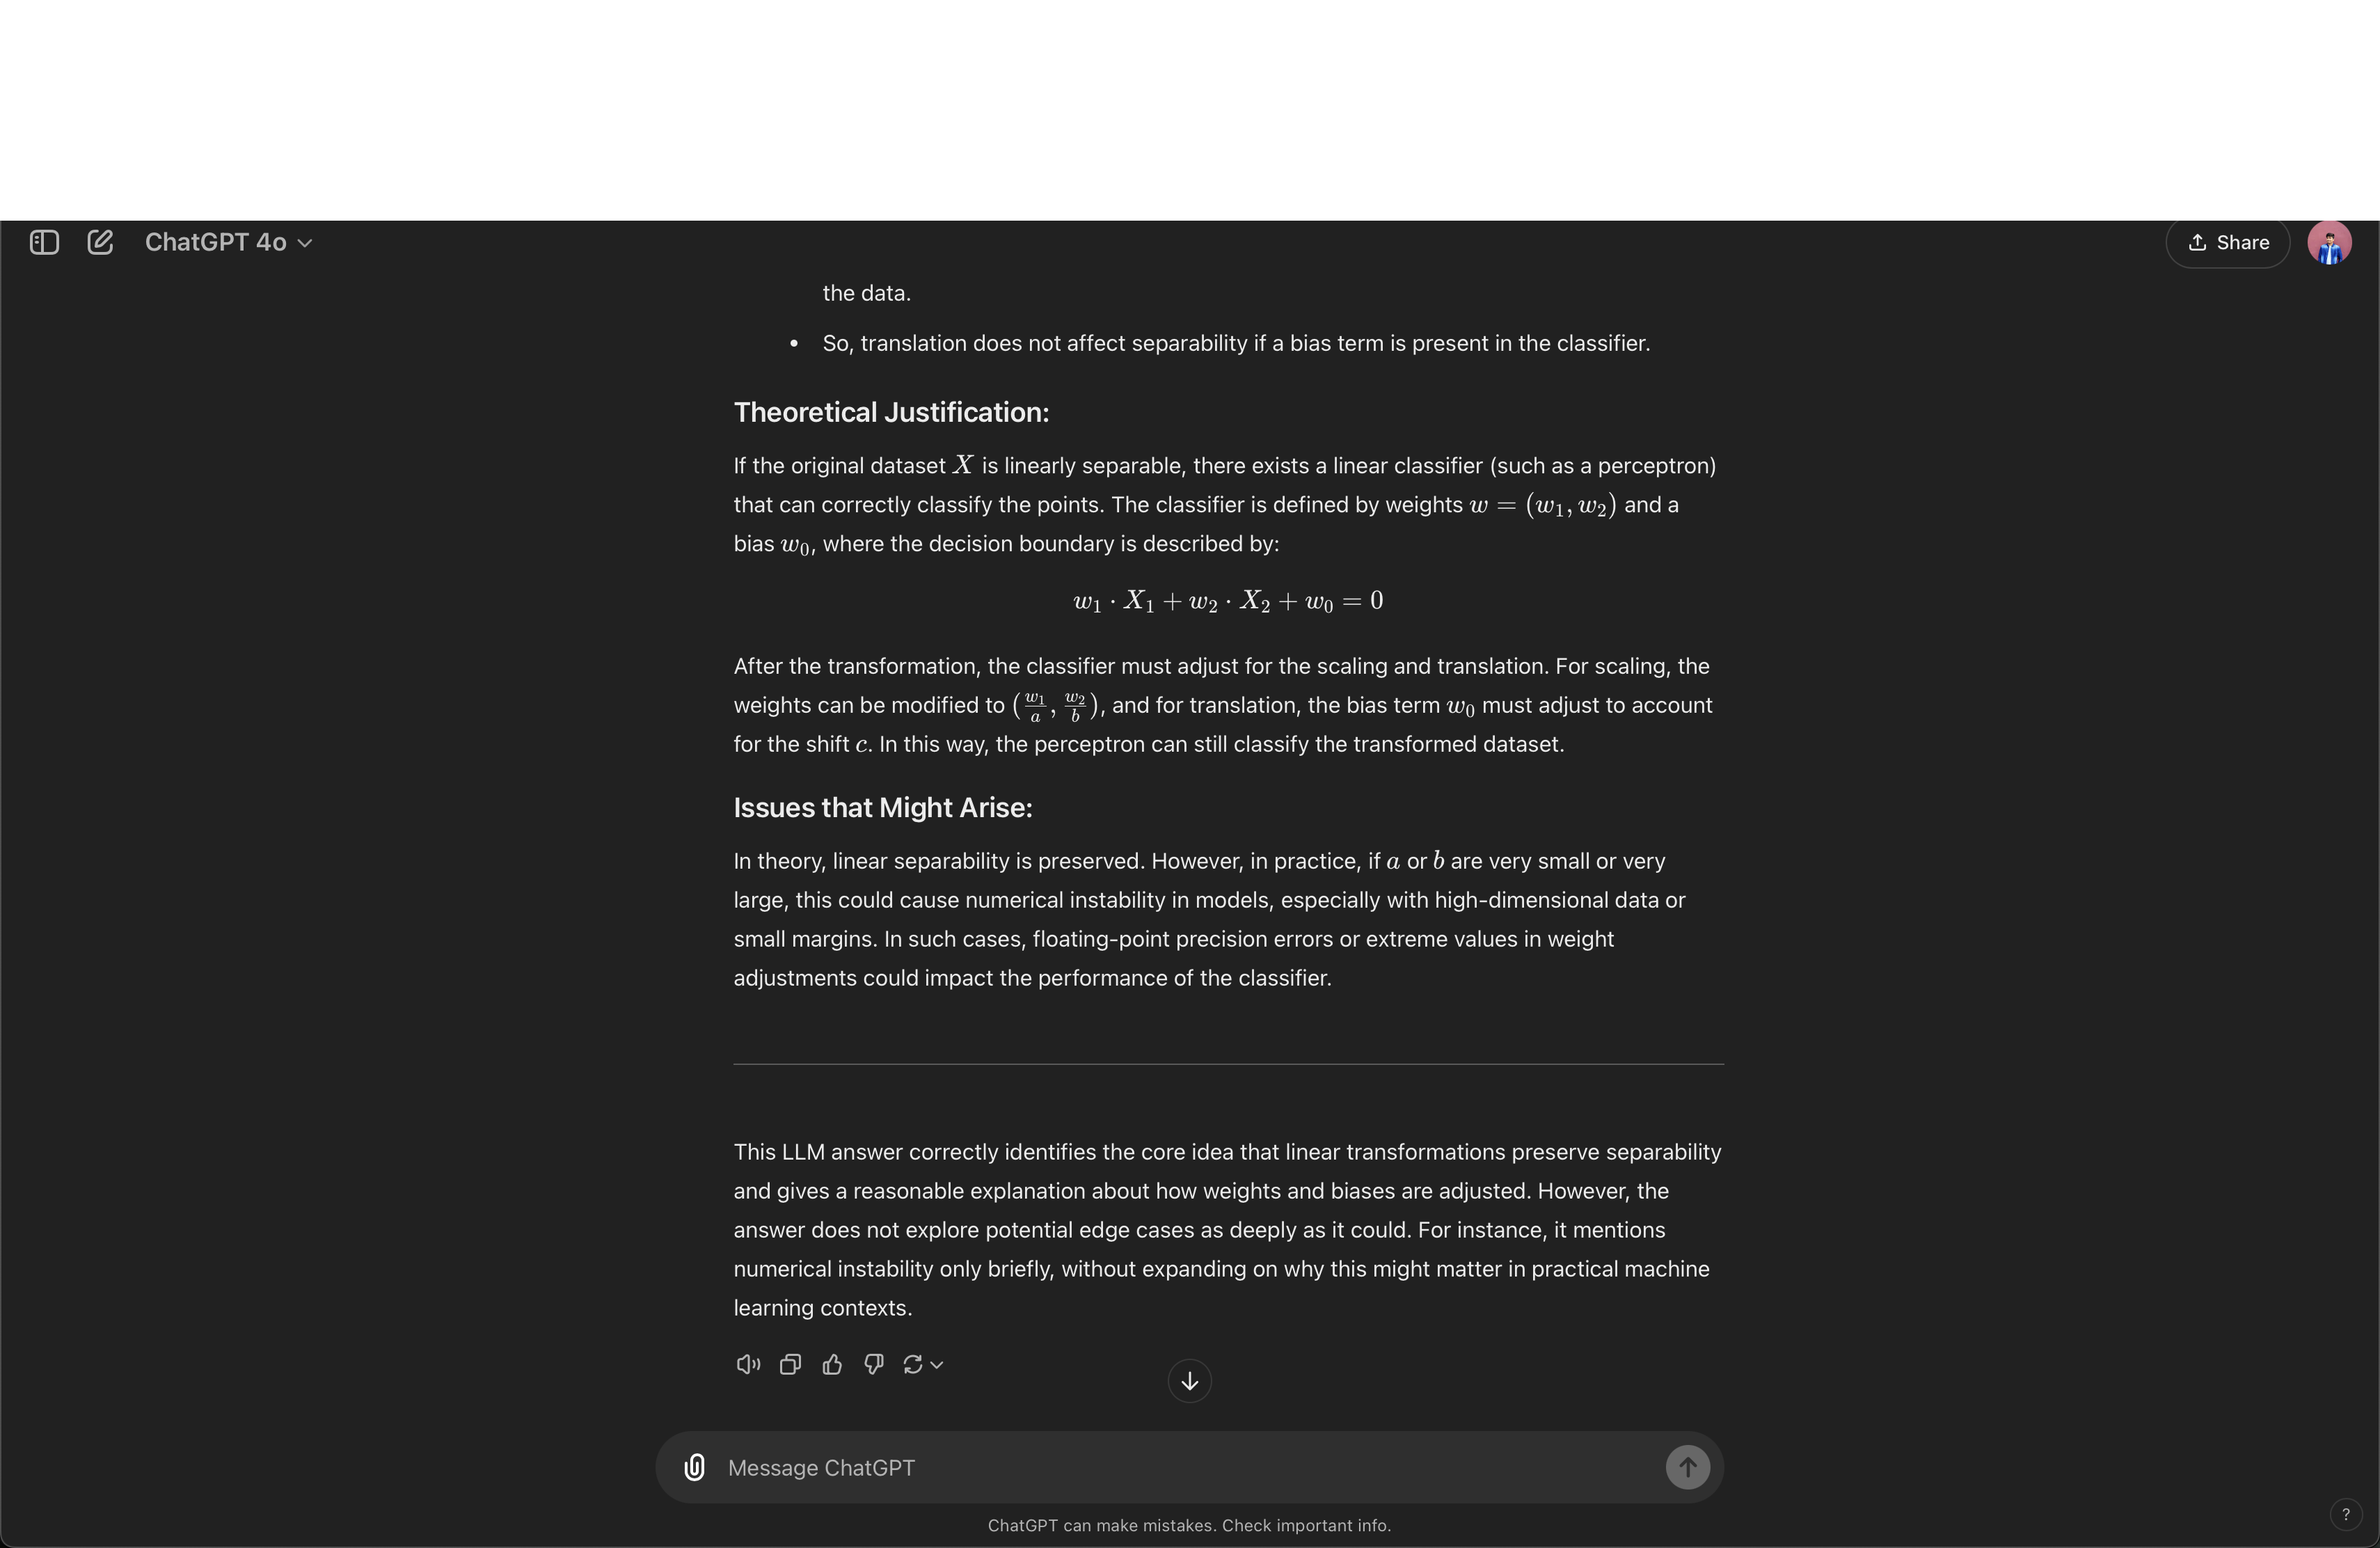

In [ ]:
# Grader's area

maxScore = maxScore + 4
# M[5,1] =

maxScore = maxScore + 4
# M[5,2] =



-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners**

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [ ]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here

# y_predicted =


In [ ]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

y_ = np.random.randn(10,1)




In [ ]:
# Grader's area

maxScore = maxScore +4
# M[6,1] =

maxScore = maxScore +4
# M[6,2] =


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore